In [1]:
"""
# Honor Statement

Name: Zhuoran Wu

E-mail: <zw118@georgetown.edu>

Platform: Windows

In accordance with the class policies and Georgetown's Honor Code,
I certify that, with the exceptions of the class resources and those
items noted below, I have neither given nor received any assistance
on this project.

Assignment 0

1 Regularization.

Using the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.

1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).
1.1.1. Create a visualization of the coefficient trajectories
1.1.2. Comment on which are the final three predictors that remain in the model
1.1.3. Use cross-validation to find the optimal value of the regularization penalty
1.1.4. How many predictors are left in that model?

1.2 Repeat with Ridge Regression.
1.2.1 Visualize the coefficient trajectories
1.2.2 Use cross-validation to find the optimal value of the regularization penalty

2 Short Answer.

2.1 Explain in your own words the bias-variance tradeoff.
    In Machine Learning Model, We would like to train a model with low bias and low variance. However, in real world,
    We could not reach this point. In this case, we need a tradeoff for variance and bias.
    In a real model, if we reach a low bias, we will have a high variance, vice versa.
    The reason why this tradeoff exists is that we always want to estimate infinite real world data according to
    limit data we have. If we trust the limit data we have, we will get a overfitting model with low bias and
    high variance. But if we want to trust the prior knowledge of model, we will reach a relative high bias.

2.2 What role does regularization play in this tradeoff?

    Regularization is a process of introducing additional information
    in order to solve an ill posed problem or to prevent overfitting.

2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance

"""

"\n# Honor Statement\n\nName: Zhuoran Wu\n\nE-mail: <zw118@georgetown.edu>\n\nPlatform: Windows\n\nIn accordance with the class policies and Georgetown's Honor Code,\nI certify that, with the exceptions of the class resources and those\nitems noted below, I have neither given nor received any assistance\non this project.\n\nAssignment 0\n\n1 Regularization.\n\nUsing the accompanying Hitters dataset (found here (Links to an external site.)Links to an external site.), we will explore regression models to predict a player's Salary from other variables. You can use any programming languages or frameworks that you wish.\n\n1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors).\n1.1.1. Create a visualization of the coefficient trajectories\n1.1.2. Comment on which are the final three predictors that remain in the model\n1.1.3. Use cross-validation to find the optimal value of the regularization penalty\n1.1.4. How many predi

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

%matplotlib inline

In [9]:
RANDOM_SEED = 19960214
MAX_ITER = 50000
CV_FOLDER = 10
TEST_SIZE = 0.2
RIDGE_ALPHA = 4

In [10]:
# Read Data
hitters = pd.read_csv("Hitters.csv", sep=",")

# Drop NaN and Name Column
hitter_df = hitters.dropna().drop(['Name'], axis=1)

# Drop Category Column and get label Salary Column
hitter_df = hitter_df.drop(['League', 'Division', 'NewLeague'], axis=1)
y = hitter_df['Salary']
hitter_df = hitter_df.drop(['Salary'], axis=1)
x = hitter_df.astype('float64')

# Cross Validation
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=TEST_SIZE, random_state=RANDOM_SEED)

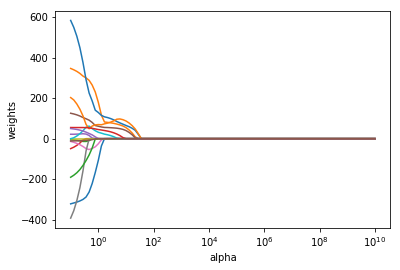

105859.06454706308
AtBat      0.000000
Hits       1.671993
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      2.434930
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.123168
CRuns      0.288605
CRBI       0.286153
CWalks     0.000000
PutOuts    0.105470
Assists    0.000000
Errors    -0.000000
dtype: float64


In [11]:
# Lasso Regression
lasso = Lasso(max_iter=MAX_ITER, normalize=True)
lasso_coefs = []

alphas = 10 ** np.linspace(10, -1, 100) * 0.5

for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(scale(x_train), y_train)
    lasso_coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas * 2, lasso_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

lasso_cv = LassoCV(alphas=None, cv=CV_FOLDER, max_iter=MAX_ITER, normalize=True)
lasso_cv.fit(x_train, y_train)
lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(x_train, y_train)
lasso_mse = mean_squared_error(y_test, lasso.predict(x_test))

print(lasso_mse)
print(pd.Series(lasso.coef_, index=x.columns))

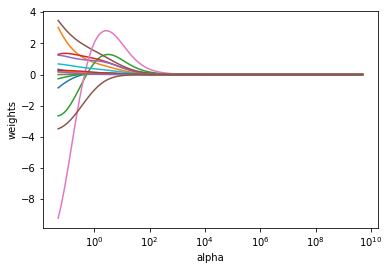

126416.92183238063
AtBat      0.092536
Hits       0.434280
HmRun      0.923445
Runs       0.672469
RBI        0.678865
Walks      0.933797
Years      2.471907
CAtBat     0.008720
CHits      0.033592
CHmRun     0.269001
CRuns      0.071632
CRBI       0.073462
CWalks     0.080335
PutOuts    0.050472
Assists    0.016127
Errors    -0.312235
dtype: float64
0.8340502686000313


In [12]:
# Ridge Regression

ridge = Ridge(normalize=True)
ridge_coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(x, y)
    ridge_coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, ridge_coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

ridge_alpha = Ridge(alpha=RIDGE_ALPHA, normalize=True)
ridge_alpha.fit(x_train, y_train)
pred2 = ridge_alpha.predict(x_test)
ridge_mse = mean_squared_error(y_test, pred2)

print(ridge_mse)
print(pd.Series(ridge_alpha.coef_, index=x.columns))

ridge_cv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridge_cv.fit(x_train, y_train)
print(ridge_cv.alpha_)
